In [2]:
import pandas as pd
import os
import numpy as np
import glob
import re
import matplotlib.pyplot as plt
import matplotlib as mp

# Data importing

In [3]:
pgfgg = pd.read_csv('all_season/Premier League 00_01.csv')

In [4]:
dir_loc='all_season/'

### Saving the file directory in loc and the year in year

In [5]:
year=[]
loc=[]
for file in os.listdir(dir_loc):
    print(file)
    
    if file[-6]=='9':
        year+=[1900+int(file[-6:-4])]
        loc+=[os.path.join(dir_loc,file)]
    else:
        year+=[2000+int(file[-6:-4])]
        loc+=[os.path.join(dir_loc,file)]

Premier League 00_01.csv
Premier League 01_02.csv
Premier League 02_03.csv
Premier League 03_04.csv
Premier League 04_05.csv
Premier League 05_06.csv
Premier League 06_07.csv
Premier League 07_08.csv
Premier League 08_09.csv
Premier League 09_10.csv
Premier League 10_11.csv
Premier League 11_12.csv
Premier League 12_13.csv
Premier League 13_14.csv
Premier League 14_15.csv
Premier League 15_16.csv
Premier League 16_17.csv
Premier League 17_18.csv
Premier League 18_19.csv
Premier League 19_20.csv
Premier League 92_93.csv
Premier League 93_94.csv
Premier League 94_95.csv
Premier League 95_96.csv
Premier League 96_97.csv
Premier League 97_98.csv
Premier League 98_99.csv
Premier League 99_00.csv


In [8]:
df_season = pd.DataFrame(loc,year)
df_season = df_season.sort_index()
df_season.reset_index(inplace=True)
df_season.rename(columns = {0:'loc','index':'year'}, inplace = True)

In [9]:
data=pd.read_csv(df_season.loc[0,'loc'])
data

,Position,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points,season
0,1,Manchester United,42,24,12,6,67,31,36,84,1992/1993
1,2,Aston Villa,42,21,11,10,57,40,17,74,1992/1993
2,3,Norwich City,42,21,9,12,61,65,-4,72,1992/1993
3,4,Blackburn Rovers,42,20,11,11,68,46,22,71,1992/1993
4,5,Queens Park Rangers,42,17,12,13,63,55,8,63,1992/1993
5,6,Liverpool,42,16,11,15,62,55,7,59,1992/1993
6,7,Sheffield Wednesday,42,15,14,13,55,51,4,59,1992/1993
7,8,Tottenham Hotspur,42,16,11,15,60,66,-6,59,1992/1993
8,9,Manchester City,42,15,12,15,56,51,5,57,1992/1993
9,10,Arsenal,42,15,11,16,40,38,2,56,1992/1993


### getting the points table data from 1993-2020, having columns Club, Points, Season, Position 

In [14]:
final_data=data[['Position','Club','season','Points']]
final_data.loc[:,'year']=1993


for j in range(1,len(df_season)):
    if j==14:
        df_add =pd.read_csv(df_season.loc[j,'loc'])
        df_add.rename(columns={'PointsForm':'Points',}, inplace=True)
        df_add.loc[:,'year']=(1993+j)
        conc=df_add[['Position','Club','season','Points','year']]
        final_data=pd.concat([final_data,conc])        
    
    elif j!=14:
        df_add =pd.read_csv(df_season.loc[j,'loc'])
        df_add.loc[:,'year']=(1993+j)
        conc=df_add[['Position','Club','season','Points','year']]
        final_data=pd.concat([final_data,conc])

final_data

C:\Users\nikhi\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Position,Club,season,Points,year
0,1,Manchester United,1992/1993,84.0,1993
1,2,Aston Villa,1992/1993,74.0,1993
2,3,Norwich City,1992/1993,72.0,1993
3,4,Blackburn Rovers,1992/1993,71.0,1993
4,5,Queens Park Rangers,1992/1993,63.0,1993
...,...,...,...,...,...
15,16,West Ham United,2019/2020,27.0,2020
16,17,Watford,2019/2020,27.0,2020
17,18,Bournemouth,2019/2020,27.0,2020
18,19,Aston Villa,2019/2020,25.0,2020


### Building a datframe with manager wins from 1993-2020

In [15]:
manager_wins_data = final_data[final_data["Position"]==1]

In [16]:
manager_wins= manager_wins_data.rename(columns = {"Position":"Title Wins"})

In [18]:
manager_wins

,Title Wins,Club,season,Points,year
0,1,Manchester United,1992/1993,84.0,1993
0,1,Manchester United,1993/1994,92.0,1994
0,1,Blackburn Rovers,1994/1995,89.0,1995
0,1,Manchester United,1995/1996,82.0,1996
0,1,Manchester United,1996/1997,75.0,1997
0,1,Arsenal,1997/1998,78.0,1998
0,1,Manchester United,1998/1999,79.0,1999
0,1,Manchester United,1999/2000,91.0,2000
0,1,Manchester United,2000/2001,80.0,2001
0,1,Arsenal,2001/2002,87.0,2002


In [19]:
manager_wins.reset_index(inplace= True,drop = True)

In [20]:
manager_wins

,Title Wins,Club,season,Points,year
0,1,Manchester United,1992/1993,84.0,1993
1,1,Manchester United,1993/1994,92.0,1994
2,1,Blackburn Rovers,1994/1995,89.0,1995
3,1,Manchester United,1995/1996,82.0,1996
4,1,Manchester United,1996/1997,75.0,1997
5,1,Arsenal,1997/1998,78.0,1998
6,1,Manchester United,1998/1999,79.0,1999
7,1,Manchester United,1999/2000,91.0,2000
8,1,Manchester United,2000/2001,80.0,2001
9,1,Arsenal,2001/2002,87.0,2002


#### Saving the file "winning_managers.xlsx"

In [21]:
file_name = 'winning_managers.xlsx'
  
# saving the excel
manager_wins.to_excel(file_name)

In [35]:
file_name = 'title_wins.xlsx'
  
# saving the excel
manager_wins.to_excel(file_name)

### Managers of manchester united
**SAF- Sir Alex Fergurson**

**DM - David moyes**

**JM - José Mourinho**

**OGS- Ole Gunnar Solskjær**

In [23]:
manager= ["SAF","SAF","SAF","SAF","SAF","SAF","SAF","SAF","DM","VG","VG",
          "JM","JM","OGS","OGS"]

In [24]:
manu_data_orig = final_data[final_data["Club"]=="Manchester United"]
manu_data_orig = manu_data_orig[manu_data_orig["year"]>2005]
manu_data_orig.reset_index(inplace = True,drop=True)
manu_data_orig["Manager"]= manager

In [25]:
manu_data = manu_data_orig

In [26]:
manu_data['Position'].mask(manu_data['Position'] == 1, '1st', inplace=True)
manu_data['Position'].mask(manu_data['Position'] == 2, '2nd', inplace=True)
manu_data['Position'].mask(manu_data['Position'] == 4, '4th', inplace=True)
manu_data['Position'].mask(manu_data['Position'] == 5, '5th', inplace=True)
manu_data['Position'].mask(manu_data['Position'] == 6, '6th', inplace=True)
manu_data['Position'].mask(manu_data['Position'] == 7, '7th', inplace=True)

In [27]:
manu_data

,Position,Club,season,Points,year,Manager
0,2nd,Manchester United,2005/2006,83.0,2006,SAF
1,1st,Manchester United,2006/2007,89.0,2007,SAF
2,1st,Manchester United,2007/2008,87.0,2008,SAF
3,1st,Manchester United,2008/2009,90.0,2009,SAF
4,2nd,Manchester United,2009/2010,85.0,2010,SAF
5,1st,Manchester United,2010/2011,80.0,2011,SAF
6,2nd,Manchester United,2011/2012,89.0,2012,SAF
7,1st,Manchester United,2012/2013,89.0,2013,SAF
8,7th,Manchester United,2013/2014,64.0,2014,DM
9,4th,Manchester United,2014/2015,70.0,2015,VG


In [28]:
likeability_scores = np.array(manu_data["Points"].values)
colors = mp.cm.autumn_r(np.linspace(0,1,600))
colors

array([[1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       ...,
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.]])

### Plotting the bar chart for the performance of manunited managers from 2006 to 2020 

<Figure size 1080x720 with 0 Axes>

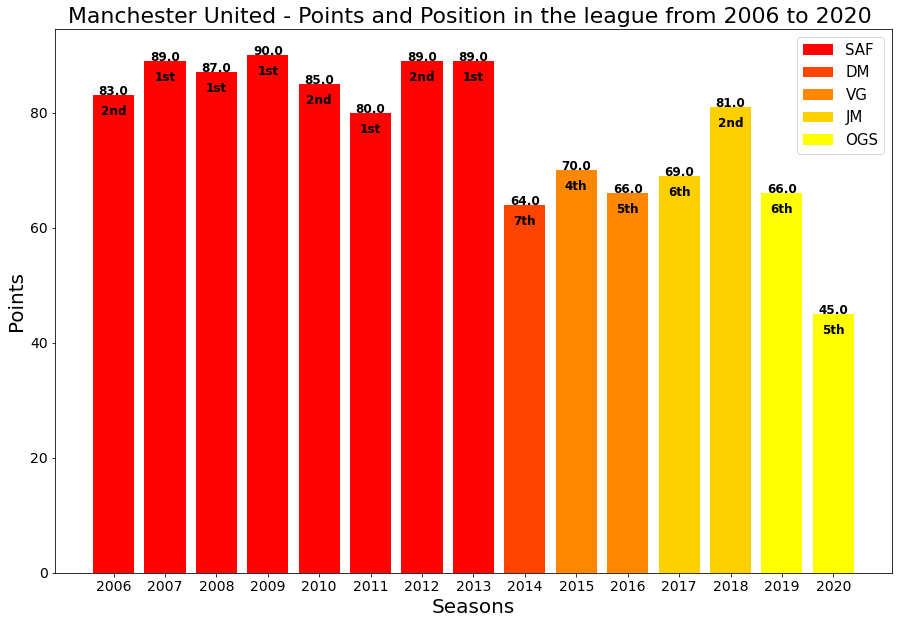

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))

bar_x = np.arange(len(manu_data))

bar_tick_label = list(manu_data["year"].values)


plt.figure(figsize=(15,10))


labels = ["SAF","DM","VG","JM","OGS"]


# Plot a bar graph:


#colors = ['red','red','red','red','red','red','red','red','orange',"lightgreen","lightgreen",'grey','grey',"pink","pink"]  
saf = plt.bar(manu_data[manu_data["Manager"]=="SAF"]["year"],manu_data[manu_data["Manager"]=="SAF"]["Points"],width=0.8,align='center',
        color=colors[590])
dm = plt.bar(manu_data[manu_data["Manager"]=="DM"]["year"],manu_data[manu_data["Manager"]=="DM"]["Points"],width=0.8,align='center',
        color=colors[440])
vg = plt.bar(manu_data[manu_data["Manager"]=="VG"]["year"],manu_data[manu_data["Manager"]=="VG"]["Points"],width=0.8,align='center',
        color=colors[280])
jm = plt.bar(manu_data[manu_data["Manager"]=="JM"]["year"],manu_data[manu_data["Manager"]=="JM"]["Points"],width=0.8,align='center',
        color=colors[110])
ogs = plt.bar(manu_data[manu_data["Manager"]=="OGS"]["year"],manu_data[manu_data["Manager"]=="OGS"]["Points"],width=0.8,align='center',
        color=colors[0])

for x,y,z in zip(bar_tick_label, likeability_scores, likeability_scores):
    plt.text(x, y, z,horizontalalignment='center',fontsize = 12,weight='bold')

for x,y,z in zip(bar_tick_label, likeability_scores, manu_data["Position"]):
    plt.text(x, y-4, z,verticalalignment='bottom',horizontalalignment='center',fontsize = 12,weight='bold')


    
plt.xticks(manu_data["year"])
plt.title("Manchester United - Points and Position in the league from 2006 to 2020 ",fontsize = 22)
plt.xlabel("Seasons",fontsize = 20)
plt.ylabel("Points",fontsize = 20)
plt.legend(labels,fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## generating a dataframe for win-loss record of arsenal from 2000-2020

In [29]:
win_data=data[['Position','Club','season','Won','Drawn','Lost']]
win_data.loc[:,'year']=1993


for j in range(1,len(df_season)):
    if j==14:
        df_add =pd.read_csv(df_season.loc[j,'loc'])
        df_add.rename(columns={'PointsForm':'Points',}, inplace=True)
        df_add.loc[:,'year']=(1993+j)
        
        conc=df_add[['Position','Club','season','Won','Drawn','Lost','year']]
        
        win_data=pd.concat([win_data,conc])        
    
    elif j!=14:
        df_add =pd.read_csv(df_season.loc[j,'loc'])
        df_add.loc[:,'year']=(1993+j)
        conc=df_add[['Position','Club','season','Won','Drawn','Lost','year']]
        win_data=pd.concat([win_data,conc])

win_data

C:\Users\nikhi\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Position,Club,season,Won,Drawn,Lost,year
0,1,Manchester United,1992/1993,24,12,6,1993
1,2,Aston Villa,1992/1993,21,11,10,1993
2,3,Norwich City,1992/1993,21,9,12,1993
3,4,Blackburn Rovers,1992/1993,20,11,11,1993
4,5,Queens Park Rangers,1992/1993,17,12,13,1993
...,...,...,...,...,...,...,...
15,16,West Ham United,2019/2020,7,6,16,2020
16,17,Watford,2019/2020,6,9,14,2020
17,18,Bournemouth,2019/2020,7,6,16,2020
18,19,Aston Villa,2019/2020,7,4,17,2020


In [30]:
ars_data_orig = win_data[win_data["Club"]=="Arsenal"]
ars_data_orig = ars_data_orig[ars_data_orig["year"]>=2000]
ars_data_orig.reset_index(inplace = True,drop=True)
#ars_data_orig["Manager"]= manager
ars_data_orig

,Position,Club,season,Won,Drawn,Lost,year
0,2,Arsenal,1999/2000,22,7,9,2000
1,2,Arsenal,2000/2001,20,10,8,2001
2,1,Arsenal,2001/2002,26,9,3,2002
3,2,Arsenal,2002/2003,23,9,6,2003
4,1,Arsenal,2003/2004,26,12,0,2004
5,2,Arsenal,2004/2005,25,8,5,2005
6,4,Arsenal,2005/2006,20,7,11,2006
7,4,Arsenal,2006/2007,19,11,8,2007
8,3,Arsenal,2007/2008,24,11,3,2008
9,4,Arsenal,2008/2009,20,12,6,2009


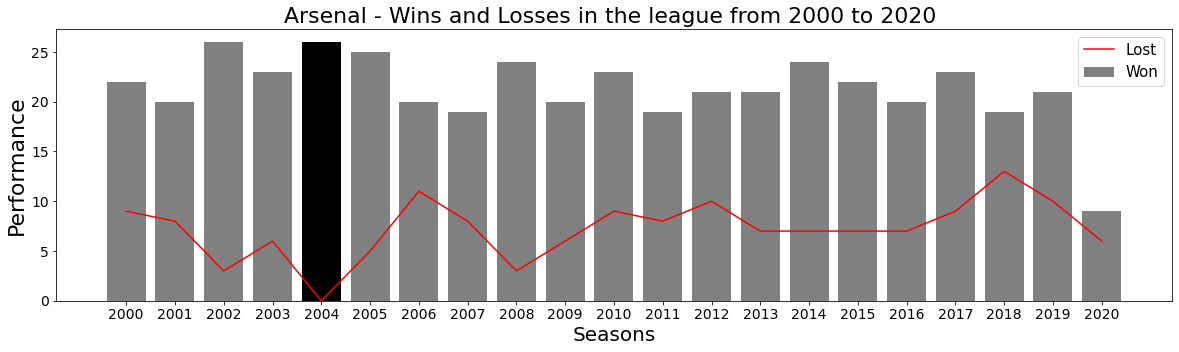

In [31]:
plt.figure(figsize=(20,5))
c = ['black' if i == 4 else 'grey' for i in ars_data_orig.index]
plt.bar(ars_data_orig["year"],ars_data_orig["Won"],width=0.8,align='center',color=c,label= 'Won')
plt.plot(ars_data_orig["year"],ars_data_orig["Lost"],color='red',label= 'Lost')


plt.xticks(ars_data_orig["year"])
plt.title("Arsenal - Wins and Losses in the league from 2000 to 2020 ",fontsize = 22)
plt.xlabel("Seasons",fontsize = 20)
plt.ylabel("Performance",fontsize = 22)
plt.legend(fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()